In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Cargamos el modelo

In [2]:
modelo = pd.read_csv('csv_files/modelo_final.csv')

In [3]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
1592472,1112393664,RzN1ZME,1.0,1,4.0,1.0,Oficial Sr de Negocios Banca Privada,10,3,3,Inversiones / Proyectos de Inversión,1.0
2783624,1112408607,X9kL3kd,4.0,2,4.0,0.0,Ejecutivo de Cuentas para Supermercados y Mayo...,10,3,3,Ventas,1.0
788198,1112481198,EzeMkp9,1.0,1,4.0,0.0,Te damos la oportunidad de Capacitarte gratis ...,10,2,3,Otros,0.0
1454199,1111574824,8lLmOL,4.0,2,5.0,0.0,Operador de Planta Acondicionadora y Motocompr...,10,3,3,Mineria/Petroleo/Gas,0.0
1285938,1112358194,YjQaO9q,3.0,1,2.0,0.0,03 Mar - Group Controller ($200k/year) - Onlin...,8,4,3,Organización y Métodos,0.0


In [4]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 12 columns):
idaviso            int64
idpostulante       object
rango_edad         float64
sexo               int64
nivel_estudios     float64
esta_estudiando    float64
titulo             object
tipo_de_trabajo    int64
nivel_laboral      int64
nombre_zona        int64
nombre_area        object
sepostulo          float64
dtypes: float64(4), int64(5), object(3)
memory usage: 274.7+ MB


Nos guardamos en un dataframe alternativo todos los registros con postulaciones efectivas del postulante al aviso en cuestión. Esto será utilizado en los features que aquí abajo construiremos.

In [5]:
si = modelo['sepostulo'] == 1
modelo_si = modelo[si]

modelo_si['sepostulo'].value_counts()

1.0    1500000
Name: sepostulo, dtype: int64

### Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

In [6]:
modelo_si['nivel_estudios'].value_counts()

4.0    760986
2.0    444447
3.0    209914
5.0     47513
6.0     28091
1.0      7154
7.0      1895
Name: nivel_estudios, dtype: int64

In [7]:
modelo_si['nivel_laboral'].value_counts()

3    978336
2    339887
1    123994
4     46387
5     11396
Name: nivel_laboral, dtype: int64

Creamos un dataframe con porcentajes por columnas. De esta forma, el heatmap nos mostrará mejor la incidencia de cada nivel de estudios para cada nivel laboral.

In [8]:
estudios_vs_laboral_t = pd.crosstab(modelo_si['nivel_laboral'], modelo_si['nivel_estudios'], normalize='columns')
estudios_vs_laboral_t

/home/towers/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
1,0.123427,0.109185,0.089737,0.068507,0.049208,0.041116,0.063852
2,0.182975,0.205458,0.222439,0.246602,0.171721,0.156883,0.181003
3,0.675706,0.665861,0.659570,0.640946,0.666470,0.656865,0.654354
4,0.014957,0.016949,0.023714,0.035489,0.082251,0.096472,0.075989
5,0.002935,0.002547,0.004540,0.008455,0.030350,0.048663,0.024802


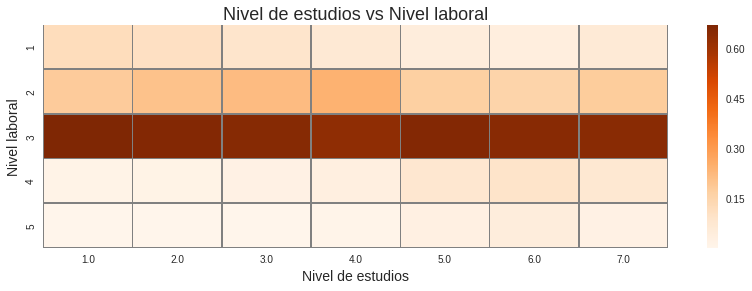

In [9]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_t, cmap='Oranges', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [10]:
n_estudios = 7
for index, row in estudios_vs_laboral_t.iterrows():
    for i in range(1,n_estudios+1):
        peso = row[i]
        nivel_estudios = i
        nivel_laboral = index
        relacion = (modelo['nivel_estudios'] == nivel_estudios) & (modelo['nivel_laboral'] == nivel_laboral)
        modelo.loc[(relacion), 'estudios_vs_laboral'] = peso

In [11]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral
1231810,1111727546,6APXDj,3.0,1,4.0,0.0,Operario sector Pañol - San Justo,10,3,3,Producción,0.0,0.640946
2540171,1112410901,BmDMmGR,1.0,2,4.0,1.0,Data Entry Administrativo,10,2,3,Administración,1.0,0.246602
2411998,1112400775,owaVVZW,2.0,1,4.0,0.0,Vendedor de Salón (CABA y GBA),10,3,3,Ventas,1.0,0.640946
2020081,1111043912,KBa2jop,3.0,1,4.0,0.0,Asistente Ejecutiva Bilingüe de Dirección,10,3,3,Secretaria,1.0,0.640946
1274764,1111724719,owzjWMj,2.0,1,4.0,0.0,Diseñador Grafico Junior,10,3,3,Diseño Gráfico,0.0,0.640946


### Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [12]:
modelo_si['esta_estudiando'].value_counts()

0.0    952095
1.0    547905
Name: esta_estudiando, dtype: int64

In [13]:
modelo_si['tipo_de_trabajo'].value_counts()

10    1270526
9      206275
6        7566
7        5035
5        3976
3        2212
4        2191
8        1595
2         557
1          67
Name: tipo_de_trabajo, dtype: int64

In [14]:
estudiando_vs_tipo_trabajo_t = pd.crosstab(modelo_si['esta_estudiando'], modelo_si['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.716418,0.524237,0.663201,0.638065,0.692404,0.269759,0.709831,0.615047,0.533763,0.652831
1.0,0.283582,0.475763,0.336799,0.361935,0.307596,0.730241,0.290169,0.384953,0.466237,0.347169


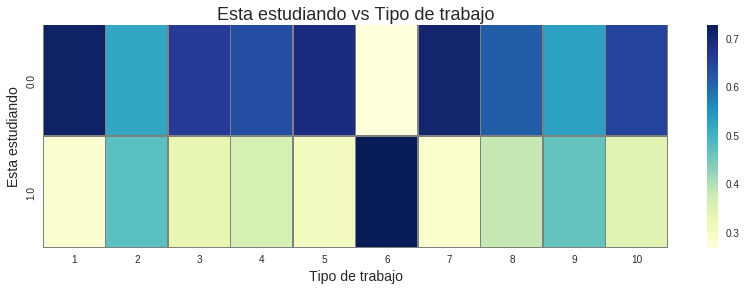

In [15]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_t, cmap='YlGnBu', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [16]:
n_trabajos = 10
for index, row in estudiando_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        esta_estudiando = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['esta_estudiando'] == esta_estudiando)
        modelo.loc[(relacion), 'estudia_vs_tipo_trabajo'] = peso

In [17]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo
655785,1112250519,JBm098W,4.0,1,4.0,0.0,Jefe de Taller Mecánico - Don Torcuato.,10,3,3,Ingeniería Mecánica,0.0,0.640946,0.652831
2238554,1112364836,wVYWW9B,1.0,1,4.0,1.0,Técnico Químico - Analista de Calidad,10,3,3,Calidad,1.0,0.640946,0.347169
142293,1112350302,JBr9MQO,2.0,1,1.0,1.0,Vendedor de salón - Chacarita,10,3,3,Ventas,0.0,0.675706,0.347169
2504778,1112269433,ZDPPqrY,2.0,1,2.0,0.0,Auxiliar de Administración,10,2,3,Contabilidad,1.0,0.205458,0.652831
116422,1112243170,xkdE0lx,1.0,1,2.0,0.0,Operario de deposito con manejo de Clark -Zona...,10,3,3,Producción,0.0,0.665861,0.652831


### Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

In [18]:
modelo_si['rango_edad'].value_counts()

1.0    515062
2.0    445065
3.0    397950
4.0    141923
Name: rango_edad, dtype: int64

In [19]:
modelo_si['tipo_de_trabajo'].value_counts()

10    1270526
9      206275
6        7566
7        5035
5        3976
3        2212
4        2191
8        1595
2         557
1          67
Name: tipo_de_trabajo, dtype: int64

In [20]:
edad_vs_tipo_trabajo_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_t

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.507463,0.707361,0.464738,0.243268,0.317907,0.623976,0.361668,0.376803,0.502475,0.315631
2.0,0.298507,0.179533,0.284358,0.321771,0.311368,0.255617,0.295531,0.263950,0.258020,0.303266
3.0,0.179104,0.095153,0.199819,0.322227,0.280936,0.104282,0.257001,0.270846,0.185413,0.279301
4.0,0.014925,0.017953,0.051085,0.112734,0.089789,0.016125,0.085799,0.088401,0.054093,0.101802


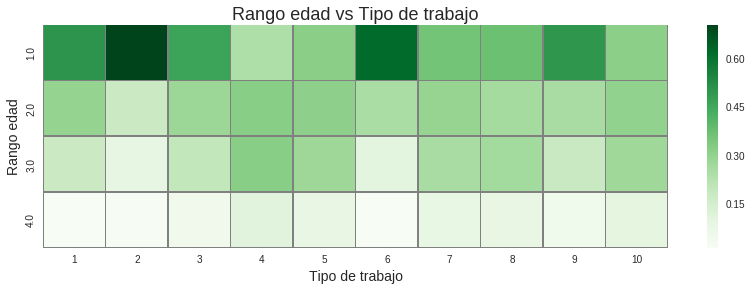

In [21]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_t, cmap='Greens', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [22]:
n_trabajos = 10
for index, row in edad_vs_tipo_trabajo_t.iterrows():
    for i in range(1,n_trabajos+1):
        peso = row[i]
        tipo_trabajo = i
        rango_edad = index
        relacion = (modelo['tipo_de_trabajo'] == tipo_trabajo) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_tipo_trabajo'] = peso

In [23]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo
363421,1111975974,3NPWvd6,1.0,1,4.0,1.0,Soporte Técnico  Área Sistemas,10,3,3,Soporte Técnico,0.0,0.640946,0.347169,0.315631
639262,1112424295,0zNGbeE,2.0,2,2.0,0.0,Vendedora de ropa de Mujer,10,3,3,Ventas,0.0,0.665861,0.652831,0.303266
2961763,1002490524,mzdDqEZ,1.0,1,4.0,0.0,Administrativa para Mayorista de Alimentos y B...,10,3,2,Administración,1.0,0.640946,0.652831,0.315631
2921816,1112460611,96XvZLw,1.0,1,3.0,1.0,Recepcionista-Argentina,10,3,3,Recepcionista,1.0,0.659570,0.347169,0.315631
1719422,1112303807,akjEdlW,4.0,2,2.0,1.0,Operario de limpieza para Cubrir Vacaciones en...,10,2,3,Otros,1.0,0.205458,0.347169,0.101802


### Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

In [24]:
modelo['rango_edad'].value_counts()

1.0    970076
3.0    834560
2.0    831195
4.0    364169
Name: rango_edad, dtype: int64

In [25]:
modelo['nombre_zona'].value_counts()

3    2778580
2     220523
1        897
Name: nombre_zona, dtype: int64

In [26]:
edad_vs_zona_t = pd.crosstab(modelo_si['rango_edad'], modelo_si['nombre_zona'], normalize='columns')
edad_vs_zona_t

nombre_zona,2,3
rango_edad,,
1.0,0.358279,0.342268
2.0,0.296940,0.296693
3.0,0.255237,0.266047
4.0,0.089543,0.094992


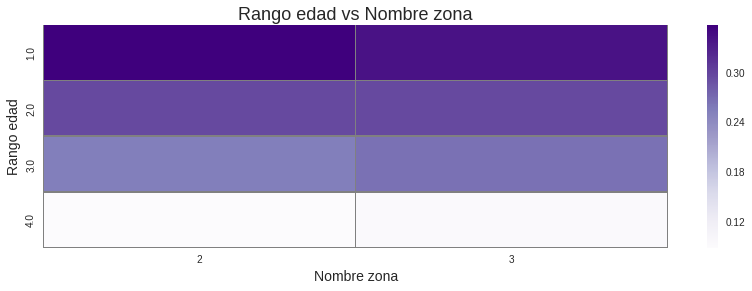

In [27]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_t, cmap='Purples', robust=False, annot=False,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

Creamos una columna en el dataframe contenedora del peso correspondiente a la combinación de las dos variables categóricas.

In [28]:
n_zonas = 3
for index, row in edad_vs_zona_t.iterrows():
    for i in range(2,n_zonas+1):
        peso = row[i]
        nombre_zona = i
        rango_edad = index
        relacion = (modelo['nombre_zona'] == nombre_zona) & (modelo['rango_edad'] == rango_edad)
        modelo.loc[(relacion), 'edad_vs_zona'] = peso

In [29]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudios_vs_laboral,estudia_vs_tipo_trabajo,edad_vs_tipo_trabajo,edad_vs_zona
285610,1112468046,LNKQz3p,4.0,1,4.0,0.0,MÉDICO CLÍNICO/ HEMATÓLOGO/ OFTALMÓLOGO/ PSIQU...,10,3,3,Medicina,0.0,0.640946,0.652831,0.101802,0.094992
2714015,1112271873,4rPoXpq,2.0,2,2.0,0.0,DT- Cajeros y Repositores - Zona Norte y CABA,10,3,3,Atención al Cliente,1.0,0.665861,0.652831,0.303266,0.296693
2809560,1112378612,mz5pJQ3,1.0,1,4.0,1.0,Recepcionista / Administrativa,10,1,2,Recepcionista,1.0,0.068507,0.347169,0.315631,0.358279
2340366,1112303105,akxllD0,1.0,2,3.0,1.0,Recepcionista Administrativa,10,2,3,Recepcionista,1.0,0.222439,0.347169,0.315631,0.342268
1031963,1112369127,aM3wKZ,3.0,2,3.0,0.0,Asistente de Marketing - Compañía Multinaciona...,10,2,3,Marketing,0.0,0.222439,0.652831,0.279301,0.266047


In [30]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 16 columns):
idaviso                    int64
idpostulante               object
rango_edad                 float64
sexo                       int64
nivel_estudios             float64
esta_estudiando            float64
titulo                     object
tipo_de_trabajo            int64
nivel_laboral              int64
nombre_zona                int64
nombre_area                object
sepostulo                  float64
estudios_vs_laboral        float64
estudia_vs_tipo_trabajo    float64
edad_vs_tipo_trabajo       float64
edad_vs_zona               float64
dtypes: float64(8), int64(5), object(3)
memory usage: 366.2+ MB


### Relación entre las distintas áreas

La idea es encontrar relaciones fuertes entre las distintas áreas de los avisos laborales. Para esto, comenzamos por analizar las áreas a las que se postuló cada postulante.

Cabe destacar que únicamente nos interesa si el postulante se postuló o no a una cierta área: no influye la cantidad de veces que lo hizo.

In [31]:
# Eliminamos las postulaciones duplicadas de un mismo postulante a una misma área
modelo_areas = modelo_si.drop_duplicates(['idpostulante','nombre_area'])

# Creamos un diccionario del estilo {idpostulante:[areas_a_las_que_se_postulo]}
dic_id_area = {}
for index, row in modelo_si.iterrows():
    area = row['nombre_area']
    idpostulante = row['idpostulante']
    if (idpostulante not in dic_id_area):
        dic_id_area[idpostulante] = [area]
    else:
        if (area not in dic_id_area[idpostulante]):
            dic_id_area[idpostulante].append(area)

Creamos una lista de listas. Cada sublista contiene las areas a las que se postuló cada postulante. Ya no nos interesa el idpostulante, sino las areas en común.

NOTA: tomamos listas de mas de un elemento y menos de 8, ya que luego calcularemos todas las duplas
posibles para cada lista. Considerar que 7C2 = 21 duplas como máximo por lista.

In [32]:
lista_areas = []
for id in dic_id_area:
    areas = dic_id_area[id]
    if (len(areas) > 1 and len(areas) < 8):
        lista_areas.append(areas)

In [33]:
df_areas = pd.DataFrame({'areas':lista_areas})
df_areas.head(5)

,areas
0,"[Desarrollo de Negocios, Ventas, Call Center, ..."
1,"[Ingeniería Mecánica, Almacén / Depósito / Ex..."
2,"[Ventas, Atención al Cliente]"
3,"[Ventas, Gastronomia, Atención al Cliente, Adm..."
4,"[Quimica, Calidad, Farmacéutica, Laboratorio]"


In [34]:
df_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136111 entries, 0 to 136110
Data columns (total 1 columns):
areas    136111 non-null object
dtypes: object(1)
memory usage: 1.0+ MB


A continuación, calcularemos todas las duplas posibles para cada lista de áreas y las ordenaremos de mayor a menor por cantidad de apariciones. De esta forma, podremos saber cuáles son las combinaciones de áreas más comunes.

In [35]:
dic_tuplas = {}
contador = 0
for index, row in df_areas.iterrows():
    areas = sorted(row['areas'])
    for area_x in areas:
        indice = areas.index(area_x)
        for area_y in areas[indice+1:]:
            tupla = (area_x, area_y)
            if (tupla not in dic_tuplas):
                dic_tuplas[tupla] = 1
            else:
                dic_tuplas[tupla] += 1

In [36]:
df_tuplas = pd.DataFrame(list(dic_tuplas.items()), columns=['dupla_areas','cantidad'])
df_tuplas = df_tuplas.sort_values(by=['cantidad'], ascending=False).reset_index()
df_tuplas = df_tuplas[['dupla_areas', 'cantidad']]

In [37]:
df_tuplas.head(200)

,dupla_areas,cantidad
0,"(Comercial, Ventas)",20070
1,"(Atención al Cliente, Ventas)",17055
2,"(Call Center, Ventas)",11339
3,"(Administración, Ventas)",11261
4,"(Atención al Cliente, Comercial)",10376
5,"(Atención al Cliente, Call Center)",9956
6,"(Administración, Comercial)",8740
7,"(Recepcionista, Ventas)",8378
8,"(Administración, Atención al Cliente)",8011
9,"(Telemarketing, Ventas)",7994


In [38]:
df_tuplas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8845 entries, 0 to 8844
Data columns (total 2 columns):
dupla_areas    8845 non-null object
cantidad       8845 non-null int64
dtypes: int64(1), object(1)
memory usage: 138.3+ KB


In [39]:
#vemos cuales son las areas mas populares.

top_areas = ['Administración','Ventas','Producción','Call Center','Recepcionista',\
             'Contabilidad','Programación','Recursos Humanos','Gastronomia','Mantenimiento',\
             'Logística','Seguridad','Transporte','Legal','Marketing','Atención al Cliente',\
             'Tecnologia / Sistemas','Medicina','Salud']

len(top_areas)
#vamos a tener 19 main areas.

19

In [40]:
df_top_areas = modelo.groupby(['nombre_area']).size().to_frame('cantidad')
df_top_areas = pd.DataFrame(df_top_areas, columns=['cantidad'])
df_top_areas = df_top_areas.sort_values('cantidad', ascending=False)

In [44]:
top_areas

['Administración',
 'Ventas',
 'Producción',
 'Call Center',
 'Recepcionista',
 'Contabilidad',
 'Programación',
 'Recursos Humanos',
 'Gastronomia',
 'Mantenimiento',
 'Logística',
 'Seguridad',
 'Transporte',
 'Legal',
 'Marketing',
 'Atención al Cliente',
 'Tecnologia / Sistemas',
 'Medicina',
 'Salud']

In [70]:
#probar

#DONDE DICE TOP SIGNIFICA QUE ES UN AREA QUE ESTA EN TOP_AREAS

#voy a agregar las areas a las que le asigno una area mayor.
dic_asignados = {}

for index, row in df_tuplas.iterrows():
    
    dupla_areas = row['dupla_areas']

    area1 = dupla_areas[0]
    area2 = dupla_areas[1]
    
    #caso1 ambas areas estan en top_areas
    #if (area1 in top_areas) and (area2 in top_areas):
        #no hago nada ya que estan ambas areas "asignadas
    
    #caso2 un area esta en top_areas y el otro area no.
    if (area1 in top_areas) and (area2 not in top_areas):
        #asigno al area2 el top
        dic_asignados[area2] = area1
        
    if (area1 not in top_areas) and (area2 in top_areas):
        #asigno al area1 el top
        dic_asignados[area1] = area2
        
    #caso3 ningun area esta en top_areas
    if (area1 not in top_areas) and (area2 not in top_areas):
        #caso3.A  area1 y area2 no fueron asignadas previamente
        if (area1 not in dic_asignados) and (area2 not in dic_asignados):
            #asigno ambos a una categoria "Otros"
            dic_asignados[area1] = "Otros"
            dic_asignados[area2] = "Otros"
    
        #caso3.B un area fue asignada previamente y la otra no
        if (area1 in dic_asignados) and (area2 not in dic_asignados):
            #me fijo a cual fue asignado el area1 y asigno el area2
            top = dic_asignados[area1]
            dic_asignados[area2] = top
        
        if (area1 not in dic_asignados) and (area2 in dic_asignados):
            #me fijo a cual fue asignado el area2 y asigno el area2
            top = dic_asignados[area2]
            dic_asignados[area1] = top


In [74]:
#me genero un diccionario de top_areas con una variable numerica asignada
i=1
dic_top_areas = {}

for area in top_areas:
    dic_top_areas[area] = i
    i+=1
dic_top_areas

{'Administración': 1,
 'Atención al Cliente': 16,
 'Call Center': 4,
 'Contabilidad': 6,
 'Gastronomia': 9,
 'Legal': 14,
 'Logística': 11,
 'Mantenimiento': 10,
 'Marketing': 15,
 'Medicina': 18,
 'Producción': 3,
 'Programación': 7,
 'Recepcionista': 5,
 'Recursos Humanos': 8,
 'Salud': 19,
 'Seguridad': 12,
 'Tecnologia / Sistemas': 17,
 'Transporte': 13,
 'Ventas': 2}

In [83]:
t0 = time()

for index, row in modelo.iterrows():
    area = row['nombre_area']
    
    if area in top_areas:
        modelo.loc[True, 'nombre_area'] = dic_top_areas[area]
    
    elif (area != 'Otros'):
        area_top = dic_asignados[area]
        modelo.loc[True, 'nombre_area'] = dic_top_areas[area_top]

modelo.loc[(modelo['nombre_area'] == 'Otros'), 'nombre_area'] = 0
    
t0 - time()

KeyError: 18

In [71]:
#deberia dar 188-19 = 169 (#total areas - #top areas)
len(dic_asignados)

162

In [72]:
#deberia dar todo false
for area_top in top_areas:
    print(area_top in dic_asignados)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
#reviso si quedaron areas sin asignar numero, asi arreglo la funcion de arriba(muchos ifs)

In [ ]:
modelo['nombre_area'].value_counts()

In [ ]:
modelo.info()

# HASTA ACA PROBAR

### Exportamos el modelo final con los nuevos features

In [ ]:
modelo.sample(5)

In [ ]:
modelo.info()

In [ ]:
modelo.to_csv('csv_files/modelo_final_featured.csv', encoding='utf-8', index=False)

### Exportamos los dataframes con los pesos obtenidos para los nuevos features

In [ ]:
estudios_vs_laboral_t.to_csv('csv_files/estudios_vs_laboral_t.csv', encoding='utf-8', index=True, header=True)

estudiando_vs_tipo_trabajo_t.to_csv('csv_files/estudiando_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_tipo_trabajo_t.to_csv('csv_files/edad_vs_tipo_trabajo_t.csv', encoding='utf-8', index=True, header=True)

edad_vs_zona_t.to_csv('csv_files/edad_vs_zona_t.csv', encoding='utf-8', index=True, header=True)